<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Website-Count" data-toc-modified-id="Website-Count-1">Website Count</a></span></li><li><span><a href="#Readability-Correlation-Plot" data-toc-modified-id="Readability-Correlation-Plot-2">Readability Correlation Plot</a></span></li><li><span><a href="#Article-Tags-Count" data-toc-modified-id="Article-Tags-Count-3">Article Tags Count</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

## Website Count

In [3]:
gdelt_df = pd.read_csv("web-count_jan2021.csv", index_col=[0]) 
gdelt_df.head()

/Users/TyPainter1/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,year,month,day,website,url
0,2021,1,1,10news.com,https://www.10news.com/news/national/coronavir...
1,2021,1,1,ketchikandailynews.com,https://www.ketchikandailynews.com/news/local/...
2,2021,1,1,grandforksherald.com,https://www.grandforksherald.com/news/accident...
3,2021,1,1,montrealgazette.com,https://montrealgazette.com/news/local-news/pr...
4,2021,1,1,energeticcity.ca,https://energeticcity.ca/2020/12/31/elderly-co...


In [4]:
gdelt_df.columns

Index(['year', 'month', 'day', 'website', 'url'], dtype='object')

In [8]:
website_count_df = pd.DataFrame(gdelt_df.website.value_counts().rename_axis('Website').reset_index(name='Count'))
website_count_df[0:20]

,Website,Count
0,iheart.com,161187
1,msn.com,81981
2,medium.com,48707
3,reuters.com,37931
4,yahoo.com,28885
5,indiatimes.com,26354
6,prnewswire.com,22544
7,dailymail.co.uk,18859
8,texasguardian.com,18031
9,apnews.com,17731


In [9]:
website_count_df.to_excel("website_counts.xlsx")

## Readability Correlation Plot

In [10]:
nlp_df = pd.read_csv("../40-nlp/nlp_jan2021.csv") # update with finalized df
nlp_df.head(5)

,year,month,day,website,url,pos_mean,pos_median,pos_min,pos_max,neg_mean,...,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex,words,complex_words,tags
0,2021,1,1,yahoo.com,https://news.yahoo.com/amazon-fire-tv-india-23...,0.00,0.0,0.0,0.0,0.00,...,8.59,83.65,10.37,38.30,9.32,3.67,10.44,113.0,8.0,AMZN
1,2021,1,1,yahoo.com,https://news.yahoo.com/red-hot-buccaneers-not-...,0.22,0.0,0.0,1.0,0.12,...,7.41,88.32,9.84,33.51,9.01,2.79,9.47,696.0,47.0,T
2,2021,1,1,yahoo.com,https://news.yahoo.com/walt-disney-dis-gains-l...,0.37,0.0,0.0,1.0,0.15,...,9.76,72.06,13.99,44.09,12.55,4.76,13.10,472.0,76.0,DIS
3,2021,1,1,yahoo.com,https://news.yahoo.com/walt-disney-dis-gains-l...,0.37,0.0,0.0,1.0,0.15,...,9.76,72.06,13.99,44.09,12.55,4.76,13.10,472.0,76.0,DOW
4,2021,1,1,yahoo.com,https://news.yahoo.com/walt-disney-dis-gains-l...,0.37,0.0,0.0,1.0,0.15,...,9.76,72.06,13.99,44.09,12.55,4.76,13.10,472.0,76.0,NDAQ


In [43]:
read_cols = ['Kincaid', 'ARI', 'Coleman-Liau',
       'FleschReadingEase', 'GunningFogIndex', 'LIX', 'SMOGIndex', 'RIX',
       'DaleChallIndex']
read_word_cols = read_cols + ['words', 'complex_words']

In [44]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(nlp_df[read_cols].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=read_cols)
df_scaled.head()

,Kincaid,ARI,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex
0,0.466667,0.497844,0.581714,0.599220,0.395116,0.405411,0.336697,0.302913,0.202083
1,0.419792,0.432199,0.514286,0.649805,0.361929,0.304164,0.308257,0.217476,0.000000
2,0.551562,0.543364,0.648571,0.473679,0.621791,0.527795,0.633028,0.408738,0.756250
3,0.551562,0.543364,0.648571,0.473679,0.621791,0.527795,0.633028,0.408738,0.756250
4,0.551562,0.543364,0.648571,0.473679,0.621791,0.527795,0.633028,0.408738,0.756250


In [45]:
df_scaled.columns

Index(['Kincaid', 'ARI', 'Coleman-Liau', 'FleschReadingEase',
       'GunningFogIndex', 'LIX', 'SMOGIndex', 'RIX', 'DaleChallIndex'],
      dtype='object')

In [46]:
corr = df_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

,Kincaid,ARI,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex
Kincaid,1.000000,0.995986,0.968278,-0.988753,0.976602,0.981870,0.972349,0.958505,0.232886
ARI,0.995986,1.000000,0.955489,-0.977700,0.981387,0.988733,0.974780,0.972901,0.276506
Coleman-Liau,0.968278,0.955489,1.000000,-0.980853,0.936088,0.932979,0.936987,0.876460,0.170158
FleschReadingEase,-0.988753,-0.977700,-0.980853,1.000000,-0.955301,-0.971309,-0.955376,-0.933372,-0.261287
GunningFogIndex,0.976602,0.981387,0.936088,-0.955301,1.000000,0.982103,0.998181,0.964546,0.339505
LIX,0.981870,0.988733,0.932979,-0.971309,0.982103,1.000000,0.976722,0.984914,0.402570
SMOGIndex,0.972349,0.974780,0.936987,-0.955376,0.998181,0.976722,1.000000,0.958258,0.346720
RIX,0.958505,0.972901,0.876460,-0.933372,0.964546,0.984914,0.958258,1.000000,0.418052
DaleChallIndex,0.232886,0.276506,0.170158,-0.261287,0.339505,0.402570,0.346720,0.418052,1.000000


In [47]:
df_scaled = scaler.fit_transform(nlp_df[read_word_cols].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=read_word_cols)
corr = df_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

,Kincaid,ARI,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex,words,complex_words
Kincaid,1.000000,0.995986,0.968278,-0.988753,0.976602,0.981870,0.972349,0.958505,0.232886,0.604365,0.683006
ARI,0.995986,1.000000,0.955489,-0.977700,0.981387,0.988733,0.974780,0.972901,0.276506,0.604117,0.685442
Coleman-Liau,0.968278,0.955489,1.000000,-0.980853,0.936088,0.932979,0.936987,0.876460,0.170158,0.545501,0.611485
FleschReadingEase,-0.988753,-0.977700,-0.980853,1.000000,-0.955301,-0.971309,-0.955376,-0.933372,-0.261287,-0.584715,-0.668038
GunningFogIndex,0.976602,0.981387,0.936088,-0.955301,1.000000,0.982103,0.998181,0.964546,0.339505,0.505990,0.599379
LIX,0.981870,0.988733,0.932979,-0.971309,0.982103,1.000000,0.976722,0.984914,0.402570,0.558993,0.659926
SMOGIndex,0.972349,0.974780,0.936987,-0.955376,0.998181,0.976722,1.000000,0.958258,0.346720,0.507011,0.599692
RIX,0.958505,0.972901,0.876460,-0.933372,0.964546,0.984914,0.958258,1.000000,0.418052,0.586011,0.684669
DaleChallIndex,0.232886,0.276506,0.170158,-0.261287,0.339505,0.402570,0.346720,0.418052,1.000000,0.030704,0.169530
words,0.604365,0.604117,0.545501,-0.584715,0.505990,0.558993,0.507011,0.586011,0.030704,1.000000,0.982599


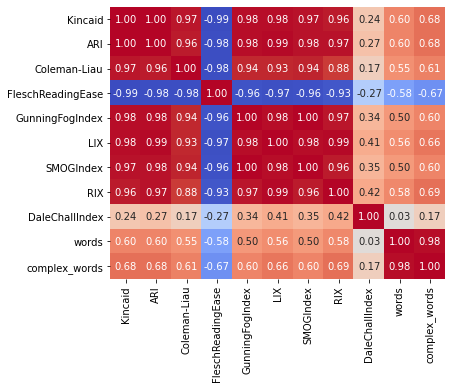

In [48]:
df = df_scaled.round(2) # with word counts
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

## Article Tags Count

In [55]:
tag_count_df = pd.DataFrame(nlp_df.tags.value_counts().rename_axis('Tags').reset_index(name='Count'))
tag_count_df.head()

,Tags,Count
0,NDAQ,6
1,DOW,5
2,T,5
3,COF,4
4,USB,3
